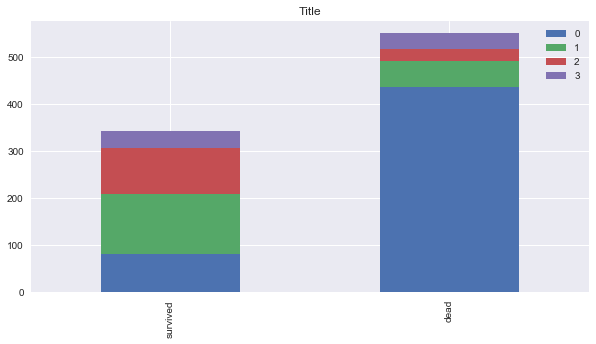

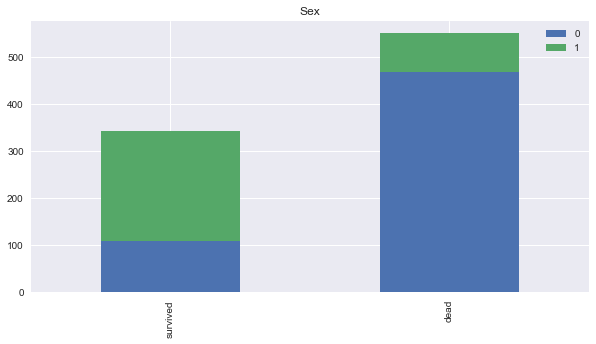

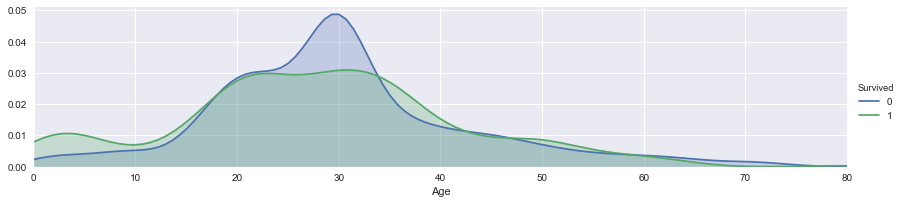

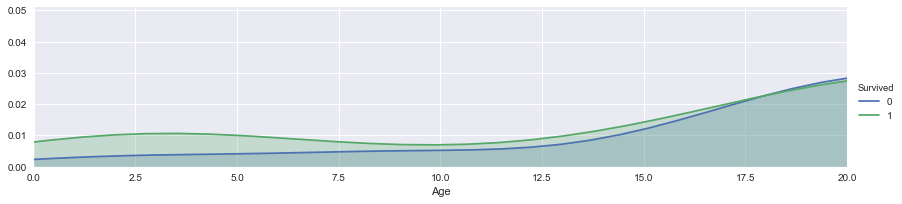

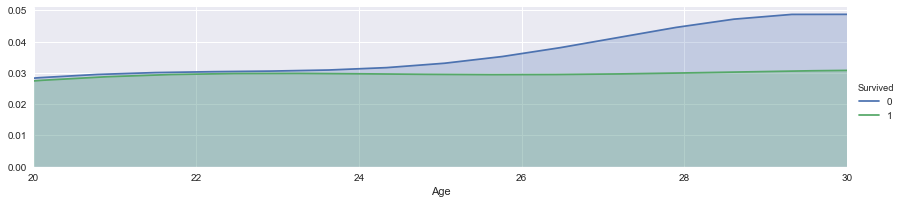

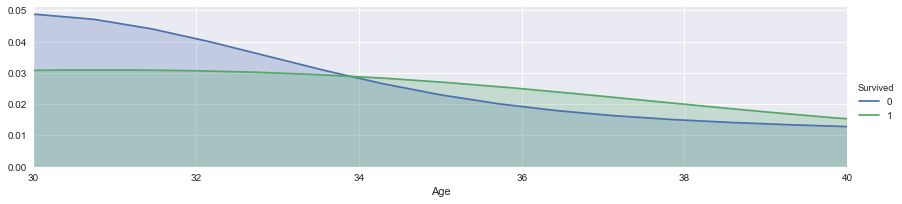

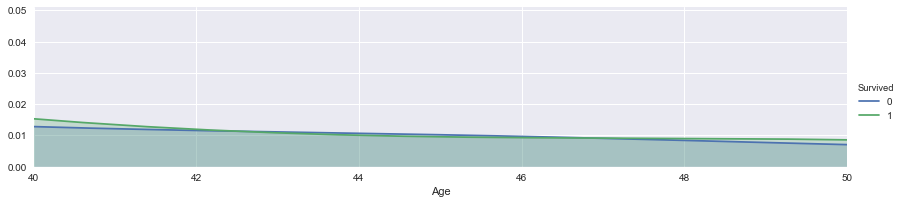

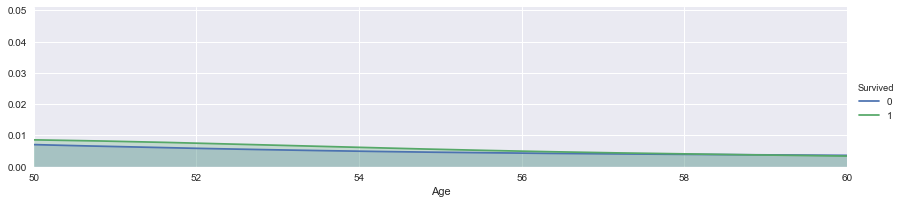

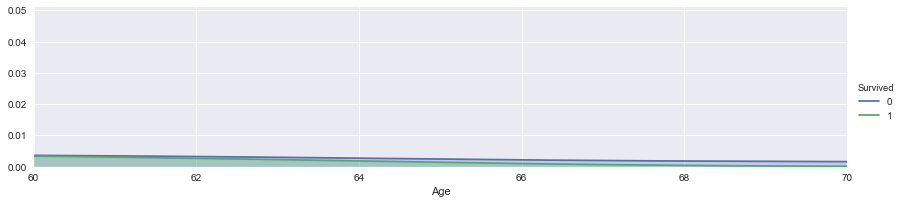

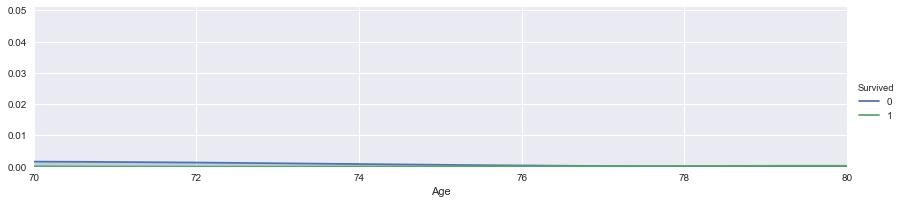

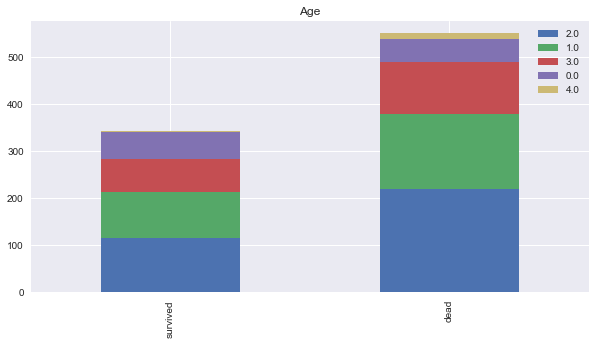

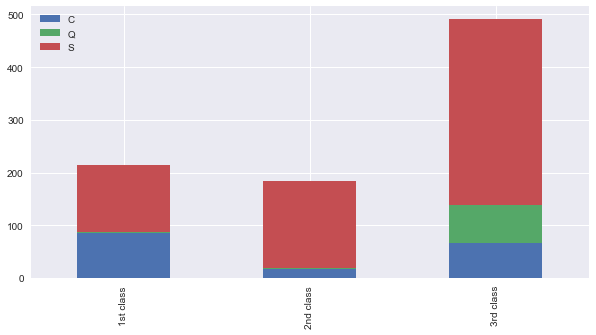

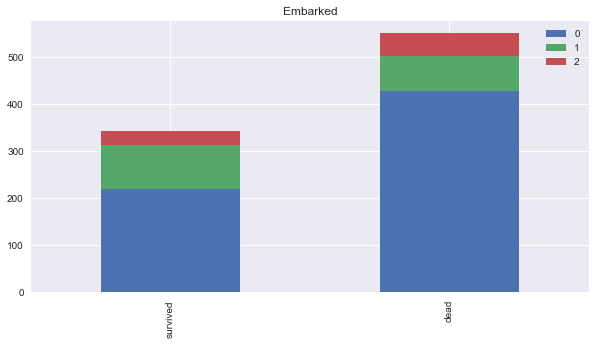

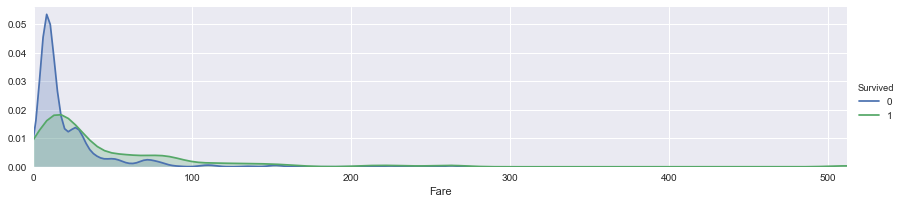

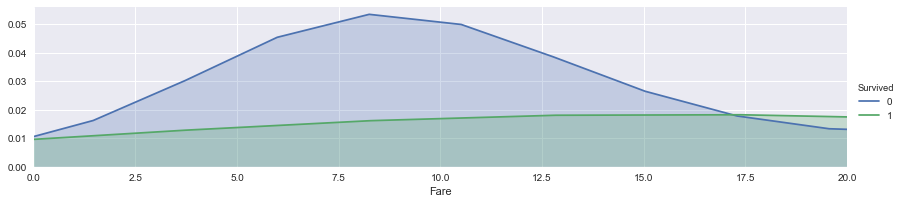

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 18 20:21:15 2019

@author: Aditya Rauthan
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#print(train.shape)
#print(train.head())
#print(train.isnull().sum())
#print(train.info())
#print(train['Name'])
#print(train.isnull())
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    #print(survived)
    #print(type(dead))
    df=pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar',figsize=(10,5),title=feature,stacked=True)
'''bar_chart('Sex')
bar_chart('Pclass')
bar_chart('SibSp')
bar_chart('Embarked')'''

#df=pd.Series([2,3,4,5],index=['a','b','c','d'])
#df.plot(kind='bar')
#print(survived)
##print(train['Sex'].value_counts())
#print(train['Survived'].value_counts())
#print(train['Name'].value_counts())
#print(train[train['Survived']==1]['Sex'].value_counts())
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
#print(train_test_data)
title_maping={'Mr':0,'Miss':1,'Mrs':2,'Master':3 ,'Dr':3,'Rev':3,'Major':3,'Col':3,'Mlle':3,'Countess':3,'Mme':3,'Ms':3,'Jonkheer':3,'Sir':3,'Lady':3,'Don':3,'Capt':3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_maping)
#print(train['Title'])
bar_chart('Title')
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
sex_mapping={'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    
bar_chart('Sex')
train['Age'].fillna(train.groupby('Title')['Age'].transform("median"),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"),inplace=True)
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()


facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,50)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(50,60)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60,70)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(70,80)
plt.show()

'''
feature vector map::
    child:0
    young:1
    adult:2
    mid-age:3
    senior:4'''
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
    dataset.loc[dataset['Age']>62,'Age']=4
bar_chart('Age')

pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

bar_chart('Embarked')

train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()


facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()


for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100,'Fare']=3
train.head()

In [3]:
train['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
F33                3
E101               3
F2                 3
C22 C26            3
E121               2
B20                2
E67                2
E24                2
D36                2
C92                2
B49                2
F G73              2
B57 B59 B63 B66    2
D35                2
E44                2
F4                 2
B18                2
C2                 2
E25                2
C68                2
E8                 2
D26                2
D33                2
C125               2
C126               2
C78                2
                  ..
B3                 1
E46                1
F E69              1
D46                1
C91                1
B4                 1
A36                1
C95                1
B102               1
B94                1
A16                1
D19                1
C118               1
B50                1
C54                1
D10 D12            1
C106         

In [7]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

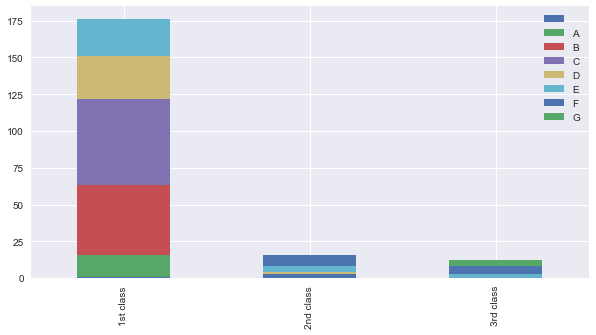

In [8]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [10]:
cabin_mapping={'A':0,'B':0.4,"C":0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [11]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)


In [13]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train['Cabin'].value_counts()

2.0    663
0.8    100
0.4     47
1.6     32
1.2     30
0.0     15
2.4      4
Name: Cabin, dtype: int64

In [15]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

In [16]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)
    

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [19]:
features_drop=['Ticket','SibSp','Parch']
train=train.drop(features_drop,axis=1)
test=test.drop(feature_drop,axis=1)
train=train.drop(['PassengerId'],axis=1)

In [20]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']
train_data.shape,target.shape

((891, 8), (891,))

In [21]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [24]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [30]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.81111111 0.76404494 0.82022472 0.83146067 0.85393258 0.80898876
 0.85393258 0.78651685 0.84269663 0.82022472]


In [33]:
round(np.mean(score)*100,2)

81.93

In [34]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.82022472 0.76404494 0.7752809  0.8988764  0.79775281
 0.82022472 0.82022472 0.75280899 0.80898876]


In [35]:
round(np.mean(score)*100,2)

80.36

In [37]:
clf=RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.85393258 0.80898876 0.79775281 0.87640449 0.79775281
 0.80898876 0.79775281 0.76404494 0.82022472]


In [39]:
round(np.mean(score)*100,2)

81.04

In [40]:
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.79775281
 0.76404494 0.80898876 0.86516854 0.83146067]


In [41]:
round(np.mean(score)*100,2)

78.67

In [42]:
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [83]:
round(np.mean(score)*100,2)
test_data['Pclass'].value_counts()
test_data.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,3.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8


In [119]:
test.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,3.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8


In [125]:
test['Pclass'].fillna(test['Pclass'].mean())
test['Sex'].fillna(test['Sex'].mean())
test['Age'].fillna(test['Age'].mean())
test['Fare'].fillna(test['Fare'].mean())
test['Cabin'].fillna(test['Cabin'].mean())
test['Embarked'].fillna(test['Embarked'].mean())
test['Title'].fillna(test['Title'].mean())
test['FamilySize'].fillna(test['FamilySize'].mean())

clf=SVC()
clf.fit(train_data,target)
prediction=clf.predict(test)

submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})
submission.to_csv('submission.csv',index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission=pd.read_csv('submission.csv')
submission.head()